In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lasio

las = lasio.read("1050383876err.las")  

In [107]:
las.well # Seccion "Well Information Block"

[HeaderItem(mnemonic="STRT", unit="FT", value="6.0", descr="START DEPTH"),
 HeaderItem(mnemonic="STOP", unit="FT", value="3533.5", descr="STOP DEPTH"),
 HeaderItem(mnemonic="STEP", unit="FT", value="0.5", descr="STEP"),
 HeaderItem(mnemonic="NULL", unit="", value="-999.25", descr="NULL VALUE"),
 HeaderItem(mnemonic="COMP", unit="", value="BLACK STONE PETROLEUM, LLC.", desc"),
 HeaderItem(mnemonic="WELL", unit="", value="KOOCHEL MOUNTAIN #1", descr="WELL"),
 HeaderItem(mnemonic="FLD", unit="", value="OTIS-ALBERT", descr="FIELD"),
 HeaderItem(mnemonic="LOC", unit="", value="530' FSL & 440' FWL", descr="LOCATI"),
 HeaderItem(mnemonic="CNTY", unit="", value="RUSH", descr="COUNTY"),
 HeaderItem(mnemonic="SRVC", unit="", value="ELI WIRELINE", descr="SERVICE COMP"),
 HeaderItem(mnemonic="DATE", unit="", value="Tue Apr 17 03-35-34 2018", descr=""),
 HeaderItem(mnemonic="UWI", unit="", value="15-165-22157-00-00", descr="UNIQUE "),
 HeaderItem(mnemonic="STAT", unit="", value="KANSAS", descr="STA

In [108]:
las.curves # Seccion "Curves Information Block"

[CurveItem(mnemonic="DEPT", unit="", value="0 000 00 00", descr="Depth", original_mnemonic="DEPT", data.shape=(7056,)),
 CurveItem(mnemonic="CNPOR", unit="PU", value="0", descr="CN Selected Porosity", original_mnemonic="CNPOR", data.shape=(7056,)),
 CurveItem(mnemonic="DCAL", unit="IN", value="0", descr="Caliper from Density Tool", original_mnemonic="DCAL", data.shape=(7056,)),
 CurveItem(mnemonic="DPOR", unit="PU", value="0", descr="Density Porosity", original_mnemonic="DPOR", data.shape=(7056,)),
 CurveItem(mnemonic="GR", unit="GAPI", value="0", descr="Gamma Ray", original_mnemonic="GR", data.shape=(7056,)),
 CurveItem(mnemonic="RHOB", unit="G/CC", value="0", descr="Bulk Density", original_mnemonic="RHOB", data.shape=(7056,)),
 CurveItem(mnemonic="RHOC", unit="G/CC", value="0", descr="Density Correction", original_mnemonic="RHOC", data.shape=(7056,)),
 CurveItem(mnemonic="RILD", unit="OHM-M", value="0", descr="DIL Deep Resistivity", original_mnemonic="RILD", data.shape=(7056,)),
 Cur

In [134]:
df = las.df() # Almacena las curvas en una dataframe
df.head(100)  # Inspección de los datos

,CNPOR,DCAL,DPOR,GR,RHOB,RHOC,RILD,RILM,RLL3,RXORT,SP,MEL15,MEL20,DT,ITT,MELCAL,SPOR
DEPT,,,,,,,,,,,,,,,,,
6.0,999.25,999.25,NaN,23.8362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6.5,999.25,999.25,NaN,28.8864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7.0,999.25,999.25,NaN,33.1935,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7.5,999.25,999.25,NaN,34.6154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8.0,999.25,999.25,NaN,36.0153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53.5,NaN,NaN,NaN,63.9627,NaN,NaN,7.4979,100000.0,0.1421,NaN,202.9361,NaN,NaN,77.0271,0.0,NaN,20.8113
54.0,NaN,NaN,NaN,61.7638,NaN,NaN,7.4339,100000.0,0.1421,NaN,202.8165,NaN,NaN,75.2392,0.0,NaN,19.5468
54.5,NaN,NaN,NaN,53.2395,NaN,NaN,7.3797,100000.0,0.1421,NaN,202.5723,NaN,NaN,73.6419,0.0,NaN,18.4172


In [110]:
df.columns # Columnas del data set  - coinciden con las curvas presentes en el registro. la libreria registra la  columna(depth) como indice del dataframe. 

Index(['CNPOR', 'DCAL', 'DPOR', 'GR', 'RHOB', 'RHOC', 'RILD', 'RILM', 'RLL3',
       'RXORT', 'SP', 'MEL15', 'MEL20', 'DT', 'ITT', 'MELCAL', 'SPOR'],
      dtype='object')

In [111]:
df_col  = df[['CNPOR', 'GR', 'RHOB', 'DT', 'MELCAL', 'SPOR']] # Selección de columnas para operar con  los datos de interés

In [112]:
df_col.isna().sum() # Cantidad de valores nulos(NaN / -999.2500) por curva

CNPOR     2064
GR          58
RHOB      2026
DT          51
MELCAL    2030
SPOR        51
dtype: int64

In [85]:
df_modif = df_col.dropna(subset=['GR', 'DT', 'SPOR'],axis=0, how='any') # elimino los nulos de las curvas seleccionadas

In [92]:
df_modif.describe() # Estadistica descriptiva básica

,CNPOR,GR,RHOB,DT,MELCAL,SPOR
count,4992.000000,6962.000000,5010.000000,6962.000000,5010.000000,6962.000000
mean,19.184611,58.035839,2.494757,82.001241,8.805313,24.329025
std,7.939384,29.548550,0.207499,29.147369,2.242689,20.613416
min,-0.087500,5.712800,1.421800,36.290500,7.148400,-7.998200
25%,13.698600,36.854175,2.441700,63.909100,7.773200,11.533975
50%,19.939850,54.724650,2.542100,74.307050,7.929500,18.887600
75%,24.594525,74.357100,2.617100,91.237475,8.648550,30.861000
max,45.596600,345.344000,2.978700,275.567300,18.451900,161.221500


In [113]:
# Filtro los datos que estan en un rango aceptado
df_filt1 = df_modif.loc[(df_modif.CNPOR > -15) | (df_modif.CNPOR <= 55)]
df_filt2 = df_filt1.loc[(df_dropped.GR > 0) & (df_dropped.GR  <= 250)]
df_filt3 = df_filt2.loc[(df_dropped.RHOB> 1) & (df_dropped.RHOB<= 3)]
df_filt = df_filt3.loc[(df_dropped.DT > 30) & (df_dropped.DT <= 140)]

In [115]:
#Genero un copia del datafarme
df = df_filt.copy() 

In [135]:
#Reindexo para poder utilizar le profundidad como columna.
df_idx = df.rename_axis('Depth').reset_index()
df_idx.head()

,Depth,CNPOR,DCAL,DPOR,GR,RHOB,RHOC,RILD,RILM,RLL3,RXORT,SP,MEL15,MEL20,DT,ITT,MELCAL,SPOR
0,6.0,999.25,999.25,NaN,23.8362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6.5,999.25,999.25,NaN,28.8864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7.0,999.25,999.25,NaN,33.1935,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7.5,999.25,999.25,NaN,34.6154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8.0,999.25,999.25,NaN,36.0153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [136]:
def log_plot(logs):
    logs = logs.sort_values(by='Depth')
    top = logs.Depth.min()
    bot = logs.Depth.max()
    
    f, ax = plt.subplots(nrows=1, ncols=5, figsize=(12,8))
    ax[0].plot(logs.GR, logs.Depth, color='green')
    ax[1].plot(logs.CNPOR, logs.Depth, color='red')
    ax[2].plot(logs.DT, logs.Depth, color='black')
    ax[3].plot(logs.MELCAL, logs.Depth, color='blue')
    ax[4].plot(logs.RHOB, logs.Depth, color='c')
    
    for i in range(len(ax)):
        ax[i].set_ylim(top,bot)
        ax[i].invert_yaxis()
        ax[i].grid()
        
    ax[0].set_xlabel("GR")
    ax[0].set_xlim(logs.GR.min(),logs.GR.max())
    ax[0].set_ylabel("Depth(ft)")
    ax[1].set_xlabel("CNPOR")
    ax[1].set_xlim(logs.CNPOR.min(),logs.CNPOR.max())
    ax[2].set_xlabel("DT")
    ax[2].set_xlim(logs.DT.min(),logs.DT.max())
    ax[3].set_xlabel("MELCAL")
    ax[3].set_xlim(logs.MELCAL.min(),logs.MELCAL.max())
    ax[4].set_xlabel("RHOB")
    ax[4].set_xlim(logs.RHOB.min(),logs.RHOB.max())
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]);
    ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]);  
    
    f.suptitle('Well:KOOCHEL MOUNTAIN #1', fontsize=14,y=0.94)

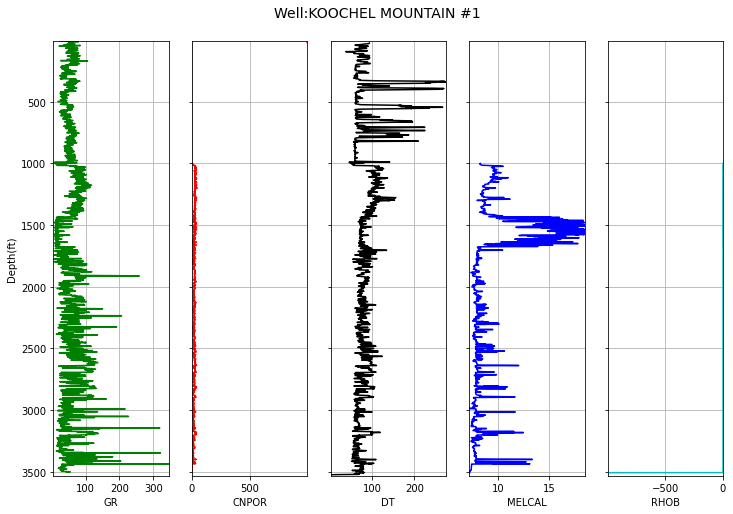

In [137]:
#Visualizamos las SIN procesar
log_plot(df_idx)

In [104]:
# Exportamos a Excel 
las.to_excel('1050383876.xlsx') 